## Introduction

In this project, the main objective is to find the best place out of three regions to develop new 200 oil wells. We will build a model for predicting the volume of reserves in new wells, pick the wells with the highest estimated reserves, and then choose the region with the highest estimated total profit for the selected oil wells. 

In [1]:
import pandas as pd
import sidetable as stb
import math
import numpy as np
from numpy.random import RandomState
from statistics import mean

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. Download and prepare the data. Explain the procedure.

Let's load the datasets.

In [2]:
region_zero = pd.read_csv('geo_data_0.csv')
region_one = pd.read_csv('geo_data_1.csv')
region_two = pd.read_csv('geo_data_2.csv')

Now we will call the info() and head() methods to get a quick look on the datasets.

In [3]:
region_zero.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
region_one.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
region_two.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Everything seems good. 

Let's move on with the investigation.

In [6]:
region_zero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
region_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
region_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


All three datasets have 100,000 observations and 5 columns. Four columns are numeric and only one is an object type. This column is in some way an index column of the oil wells, so we will drop it for the model training process because it doesn't contain any information that we can use for our predictions. 
It seems that there are no missing values in the data sets. But we will check with the stb() library, later on, just to be sure.  

In [9]:
region_zero.drop(['id'], axis = 1, inplace = True)
region_one.drop(['id'], axis = 1, inplace = True)
region_two.drop(['id'], axis = 1, inplace = True)

In [10]:
region_zero.head(2)

,f0,f1,f2,product
0,0.705745,-0.497823,1.22117,105.280062
1,1.334711,-0.340164,4.36508,73.037750


In [11]:
region_one.head(2)

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261


In [12]:
region_two.head(2)

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697


Great!

We removed the **id** columns from all datasets.

**Missing values**

In [13]:
region_zero.stb.missing(style = True)

,missing,total,percent
f0,0,"100,000",0.00%
f1,0,"100,000",0.00%
f2,0,"100,000",0.00%
product,0,"100,000",0.00%


In [14]:
region_one.stb.missing(style = True)

,missing,total,percent
f0,0,"100,000",0.00%
f1,0,"100,000",0.00%
f2,0,"100,000",0.00%
product,0,"100,000",0.00%


In [15]:
region_two.stb.missing(style = True)

,missing,total,percent
f0,0,"100,000",0.00%
f1,0,"100,000",0.00%
f2,0,"100,000",0.00%
product,0,"100,000",0.00%


Great!

We don't have missing values in non of the datasets - it's our lucky day! :)

**Duplicates**

Let's check if there are any duplicates. 

In [16]:
region_zero.duplicated().sum()

0

In [17]:
region_one.duplicated().sum()

0

In [18]:
region_two.duplicated().sum()

0

No duplicates!

**Distribution of the variables**

In [19]:
def dis(data):
    data.hist(edgecolor = 'black', linewidth = 1.2, figsize = (10,10))
    plt.show()

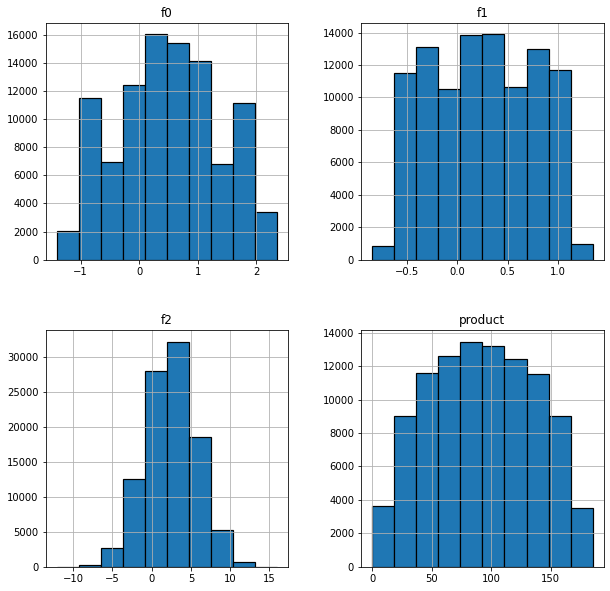

In [20]:
dis(region_zero)

All variables (the independent and the dependent), except **f1** are distributed pretty much normally. The **f1** variable has a uniform distribution.

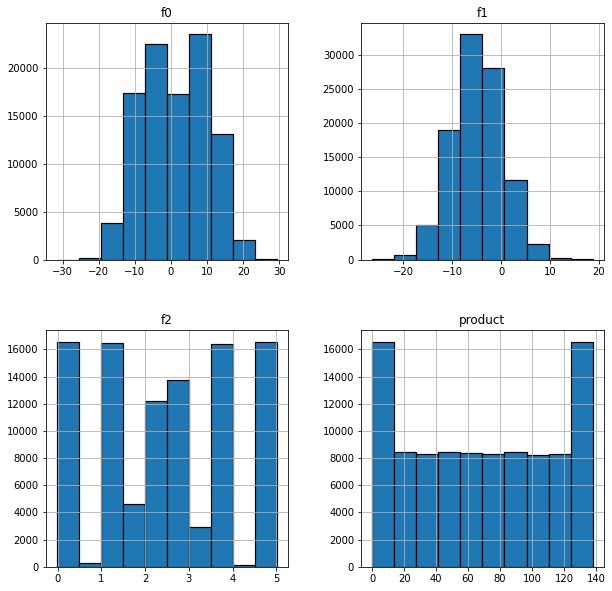

In [21]:
dis(region_one)

Here we see that **f0 and f1** have a pretty normal distribution, while **f2** has very strange and unorganized distribution and the product variable (our dependent variable) has a pretty uniform distribution. 

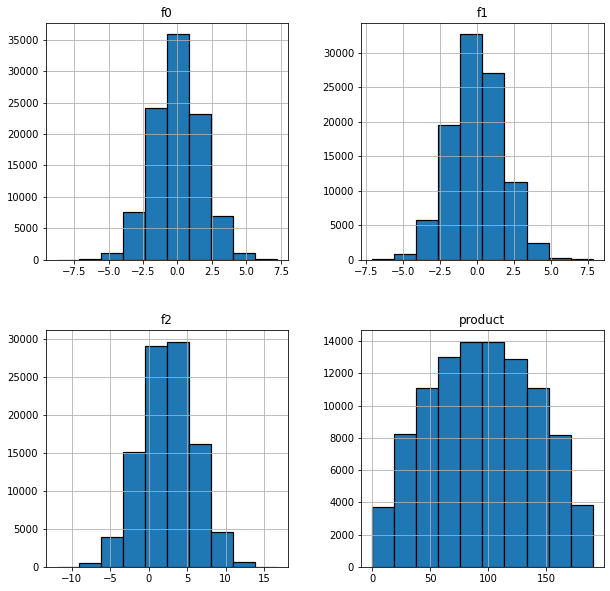

In [22]:
dis(region_two)

For region 2, it seems that all the variables distribute pretty much normally. 

Let's go check for outliers.

**Outliers**

**region zero**

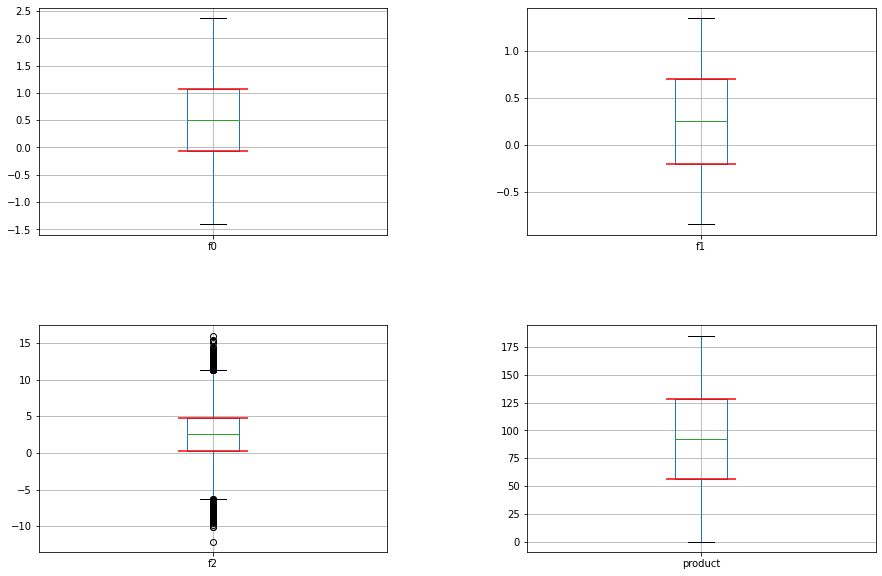

In [23]:
col = region_zero.columns
fig = plt.figure(figsize =(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,len(col)+1):
    ax = fig.add_subplot(2, 2, i)
    region_zero.boxplot(col[i-1])
    Q1 = region_zero[col[i-1]].quantile(0.25)
    Q3 = region_zero[col[i-1]].quantile(0.75)
    plt.hlines(y=[Q1,Q3], xmin = 0.9, xmax = 1.1, color = 'red')

Here we see that only one variable has outliers - the **f2** feature. The boxplot shows us that a value that is above 10 or beneath -6 is an outlier. For our model training, we need the cleanest data that we can possibly obtain. Outliers can damage the model training ann lead to inaccurate predictions. In order to avoid it, we will delete these values for the **f2** feature. 

Let's go.

In [24]:
Q1_reg0 = region_zero['f2'].quantile(0.25)
Q3_reg0 = region_zero['f2'].quantile(0.75)
IQR_reg0 = Q3_reg0 - Q1_reg0
box_max_0 = math.floor(Q3_reg0 + 1.5*IQR_reg0)
box_min_0 = math.ceil(Q1_reg0 - 1.5*IQR_reg0)

In [25]:
region_zero.drop(region_zero[
    (region_zero['f2'] > box_max_0) | (region_zero['f2'] < box_min_0)].index, inplace = True)

In [26]:
print('Max value of the f2 feature after filtering','(max', box_max_0,')', round(region_zero['f2'].max(), 2))
print('Min value of the f2 feature after filtering','(min', box_min_0,')', round(region_zero['f2'].min(), 2))

Max value of the f2 feature after filtering (max 11 ) 11.0
Min value of the f2 feature after filtering (min -6 ) -5.99


Great!

Let's look again on the boxplot of the variables.

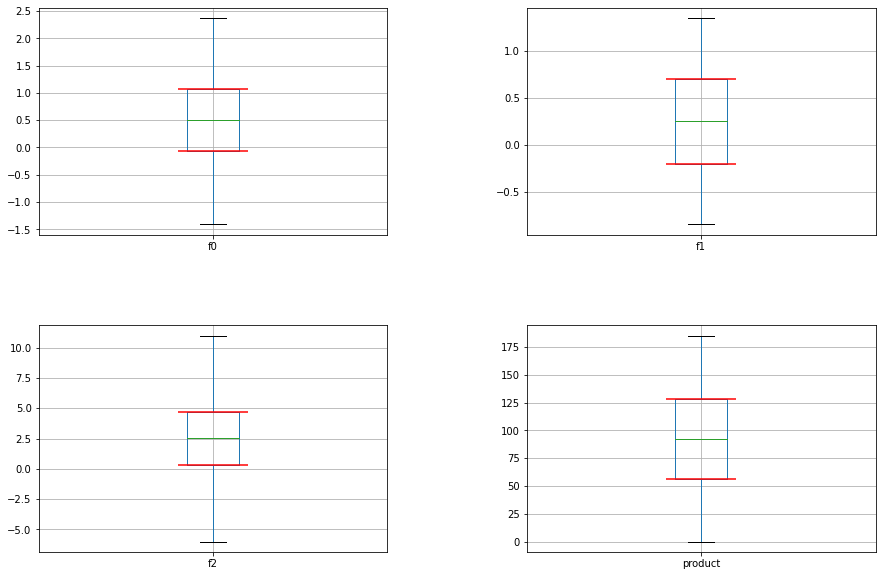

In [27]:
col = region_zero.columns
fig = plt.figure(figsize =(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,len(col)+1):
    ax = fig.add_subplot(2, 2, i)
    region_zero.boxplot(col[i-1])
    Q1 = region_zero[col[i-1]].quantile(0.25)
    Q3 = region_zero[col[i-1]].quantile(0.75)
    plt.hlines(y=[Q1,Q3], xmin = 0.9, xmax = 1.1, color = 'red')

Excellent!

The filtering worked, now we don't have outliers in the data of region zero. 

Let's move on to the next region.

**region one**

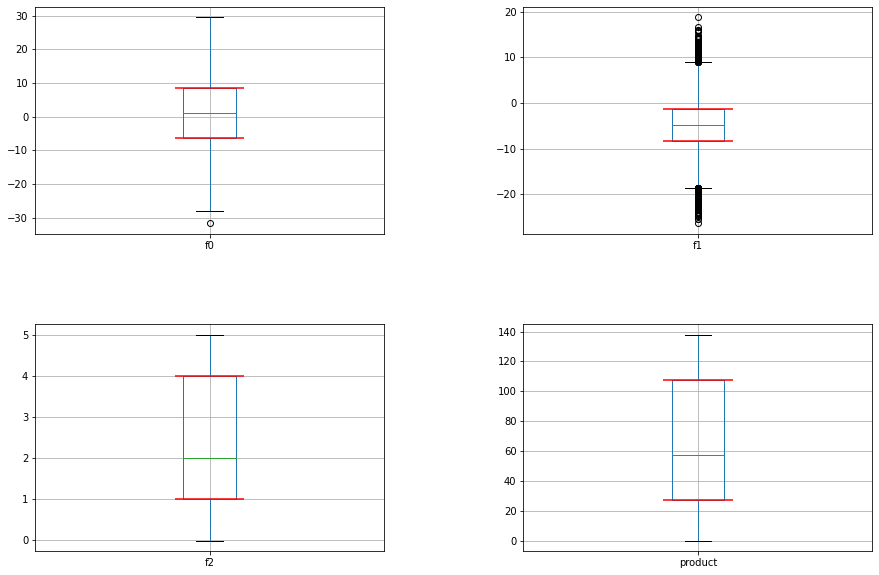

In [28]:
col = region_one.columns
fig = plt.figure(figsize =(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,len(col)+1):
    ax = fig.add_subplot(2, 2, i)
    region_one.boxplot(col[i-1])
    Q1 = region_one[col[i-1]].quantile(0.25)
    Q3 = region_one[col[i-1]].quantile(0.75)
    plt.hlines(y=[Q1,Q3], xmin = 0.9, xmax = 1.1, color = 'red')

The output shows us that the data for region one contain outliers in the **f1** feature. As mentioned before, we want the cleanest data possible for our model training, so here also we will delete the outliers to prevent them from damaging the accuracy of the predictions. 

The box plot shows that every value that is above 8 or beneath -18 is an outlier. We will remove these values from the data of region one.

In [29]:
Q1_reg1 = region_one['f1'].quantile(0.25)
Q3_reg1 = region_one['f1'].quantile(0.75)
IQR_reg1 = Q3_reg1 - Q1_reg1
box_max_1 = math.floor(Q3_reg1 + 1.5*IQR_reg1)
box_min_1 = math.ceil(Q1_reg1 - 1.5*IQR_reg1)

In [30]:
region_one.drop(region_one[
    (region_one['f1'] > box_max_1) | (region_one['f1'] < box_min_1)].index, inplace = True)

In [31]:
print('Max value of the f1 feature after filtering','(max', box_max_1,')', round(region_one['f1'].max(), 2))
print('Min value of the f1 feature after filtering','(min', box_min_1,')', round(region_one['f1'].min(), 2))

Max value of the f1 feature after filtering (max 9 ) 8.99
Min value of the f1 feature after filtering (min -18 ) -18.0


Great!

Now let's look at the boxplots again after the filtering to make sure that everything is o.k.

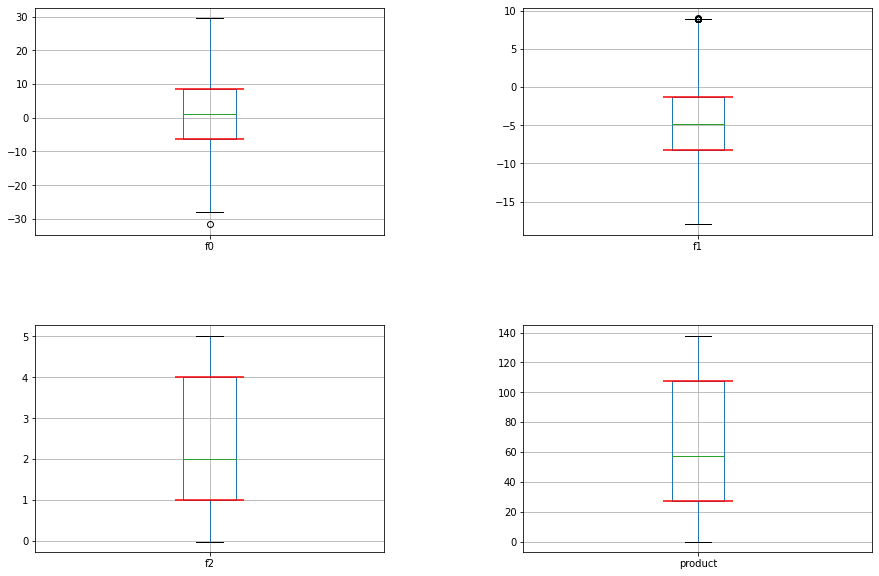

In [32]:
col = region_one.columns
fig = plt.figure(figsize =(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,len(col)+1):
    ax = fig.add_subplot(2, 2, i)
    region_one.boxplot(col[i-1])
    Q1 = region_one[col[i-1]].quantile(0.25)
    Q3 = region_one[col[i-1]].quantile(0.75)
    plt.hlines(y=[Q1,Q3], xmin = 0.9, xmax = 1.1, color = 'red')

We still see in the boxplot of variable **f1** that there left some outliers. Let's take care of them.

In [33]:
Q1_reg1 = region_one['f1'].quantile(0.25)
Q3_reg1 = region_one['f1'].quantile(0.75)
IQR_reg1 = Q3_reg1 - Q1_reg1
box_max_1 = math.floor(Q3_reg1 + 1.5*IQR_reg1)
box_min_1 = math.ceil(Q1_reg1 - 1.5*IQR_reg1)

In [34]:
region_one.drop(region_one[
    (region_one['f1'] > box_max_1) | (region_one['f1'] < box_min_1)].index, inplace = True)

In [35]:
print('Max value of the f1 feature after filtering','(max', box_max_1,')', round(region_one['f1'].max(), 2))
print('Min value of the f1 feature after filtering','(min', box_min_1,')', round(region_one['f1'].min(), 2))

Max value of the f1 feature after filtering (max 8 ) 8.0
Min value of the f1 feature after filtering (min -18 ) -18.0


Great!

Let's check the boxplot now.

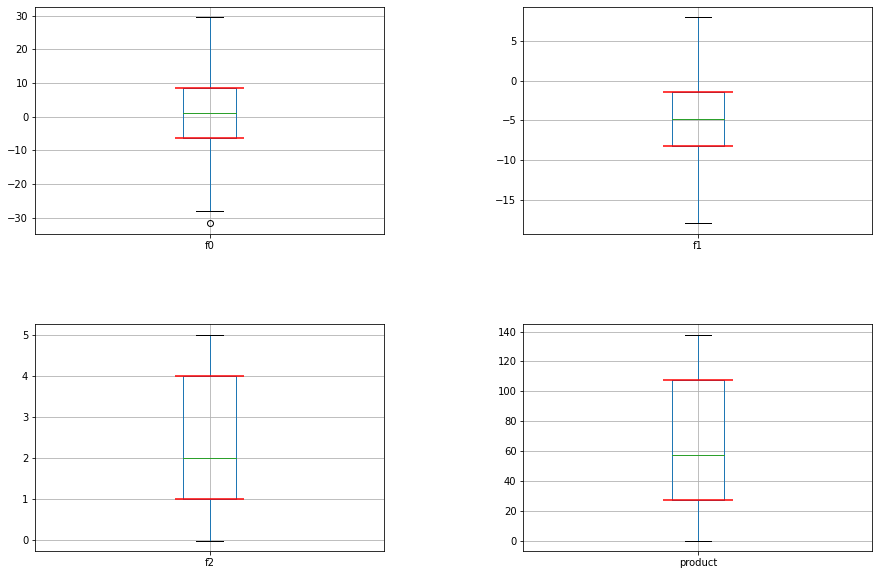

In [36]:
col = region_one.columns
fig = plt.figure(figsize =(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,len(col)+1):
    ax = fig.add_subplot(2, 2, i)
    region_one.boxplot(col[i-1])
    Q1 = region_one[col[i-1]].quantile(0.25)
    Q3 = region_one[col[i-1]].quantile(0.75)
    plt.hlines(y=[Q1,Q3], xmin = 0.9, xmax = 1.1, color = 'red')

Nice!

Let's move on to the next region.

**region two**

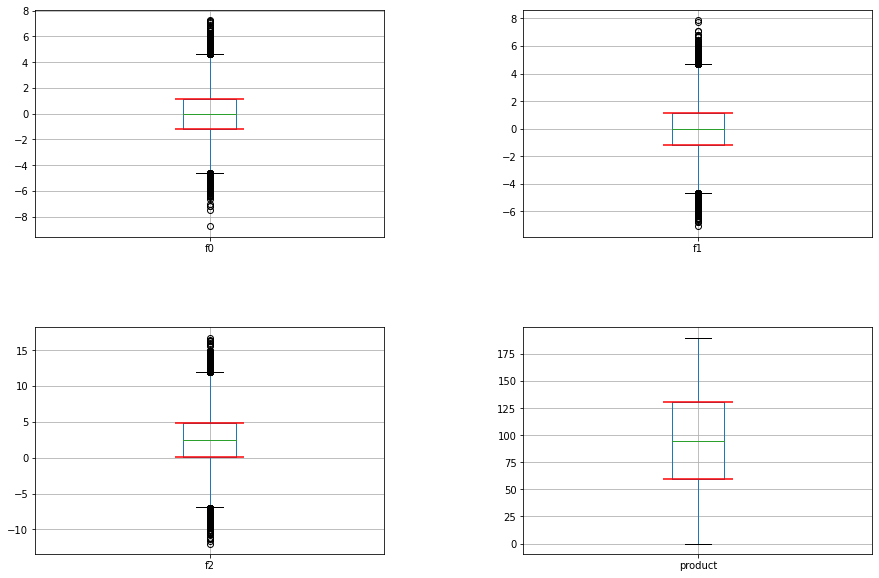

In [37]:
col = region_two.columns
fig = plt.figure(figsize =(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,len(col)+1):
    ax = fig.add_subplot(2, 2, i)
    region_two.boxplot(col[i-1])
    Q1 = region_two[col[i-1]].quantile(0.25)
    Q3 = region_two[col[i-1]].quantile(0.75)
    plt.hlines(y=[Q1,Q3], xmin = 0.9, xmax = 1.1, color = 'red')

This data set has outliers in all 3 features! Lucky we checked it out. Now we will remove them by the values that the boxplots indicate us.

In [38]:
# Feature f0 quantiles
Q1_fo = region_two['f0'].quantile(0.25)
Q3_fo = region_two['f0'].quantile(0.75)
IQR_fo = Q3_fo - Q1_fo 
box_max_f0 = math.floor(Q3_fo + 1.5*IQR_fo)
box_min_f0 = math.ceil(Q1_fo - 1.5*IQR_fo)

# Feature f1 quantiles
Q1_f1 = region_two['f1'].quantile(0.25)
Q3_f1 = region_two['f1'].quantile(0.75)
IQR_f1 = Q3_f1 - Q1_f1 
box_max_f1 = math.floor(Q3_f1 + 1.5*IQR_f1)
box_min_f1 = math.ceil(Q1_f1 - 1.5*IQR_f1)

# Feature f2 quantiles
Q1_f2 = region_two['f2'].quantile(0.25)
Q3_f2 = region_two['f2'].quantile(0.75)
IQR_f2 = Q3_f2 - Q1_f2 
box_max_f2 = math.floor(Q3_f2 + 1.5*IQR_f2)
box_min_f2 = math.ceil(Q1_f2 - 1.5*IQR_f2)

In [39]:
region_two.drop(region_two[(region_two['f0']  > box_max_f0) | (region_two['f0'] < box_min_f0)].index, inplace = True)
region_two.drop(region_two[(region_two['f1']  > box_max_f1) | (region_two['f1'] < box_min_f1)].index, inplace = True)
region_two.drop(region_two[(region_two['f2']  > box_max_f2) | (region_two['f2'] < box_min_f2)].index, inplace = True)

In [40]:
col = region_two.columns
box_max = [box_max_f0, box_max_f1, box_max_f2]
box_min = [box_min_f0, box_min_f1, box_min_f2]
for i in range(len(col)-1):
    print('Max value of the', col[i] ,'feature after filtering','(max', box_max[i],')', round(region_two[col[i]].max(), 2))
    print('Min value of the', col[i] ,'feature after filtering','(min', box_min[i],')', round(region_two[col[i]].min(), 2))
    print('===================================================================')

Max value of the f0 feature after filtering (max 4 ) 4.0
Min value of the f0 feature after filtering (min -4 ) -4.0
Max value of the f1 feature after filtering (max 4 ) 4.0
Min value of the f1 feature after filtering (min -4 ) -4.0
Max value of the f2 feature after filtering (max 11 ) 11.0
Min value of the f2 feature after filtering (min -6 ) -6.0


Awesome! 

Now let's plot against the box plots to be certain that everything is alright.

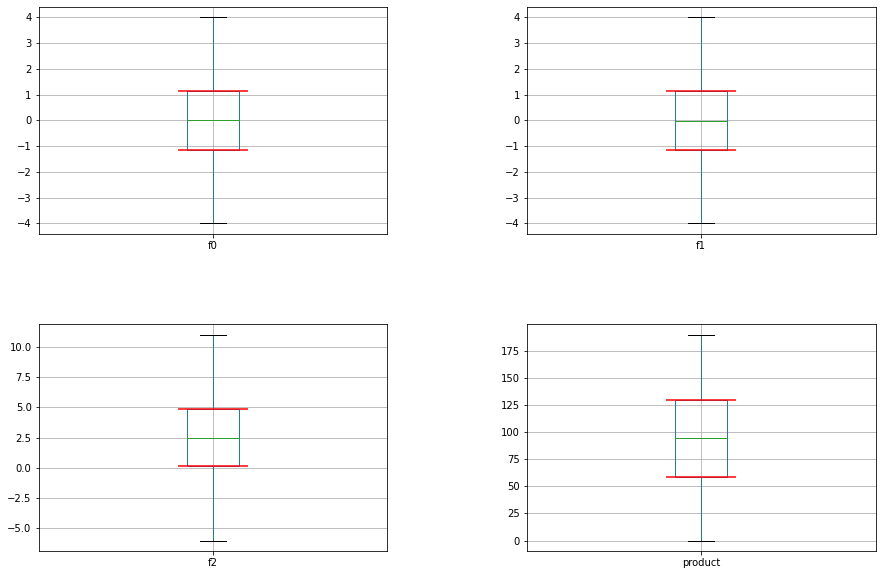

In [41]:
col = region_two.columns
fig = plt.figure(figsize =(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,len(col)+1):
    ax = fig.add_subplot(2, 2, i)
    region_two.boxplot(col[i-1])
    Q1 = region_two[col[i-1]].quantile(0.25)
    Q3 = region_two[col[i-1]].quantile(0.75)
    plt.hlines(y=[Q1,Q3], xmin = 0.9, xmax = 1.1, color = 'red')

Great!

We removed the outliers from all the 3 features in the data of region two. Let's check just for curiosity how much data we removed.

We know from earlier that all three data sets have 100,000 rows. So we will use this number to find out how much data we lost.

In [42]:
regions = [region_zero, region_one, region_two]
region_name=['Region zero', 'Region one', 'Region two']
for i in range(len(regions)):
    print(region_name[i],'data lost: {:.2%}'.format(1- len(regions[i])/100000))
    print('===========================')

Region zero data lost: 0.75%
Region one data lost: 1.09%
Region two data lost: 5.42%


Region two lost the largest amount of data - it makes sense because it had outliers in all its 3 features. 
The other 2 regions lost a very little amount of data, around 1%. Overall, the loss of data when removing the outliers wasn't so big, so it won't damage our analysis and model training. 

**Correlation**

Let's check how our variables correlate with each other.

**region zero**

In [43]:
# Building a heat map correlation function
def corr(data):
    plt.figure(figsize=(15,5))
    ax = sns.heatmap(region_zero.corr(), annot=True, cmap='cividis')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5);
    plt.yticks(rotation=0);

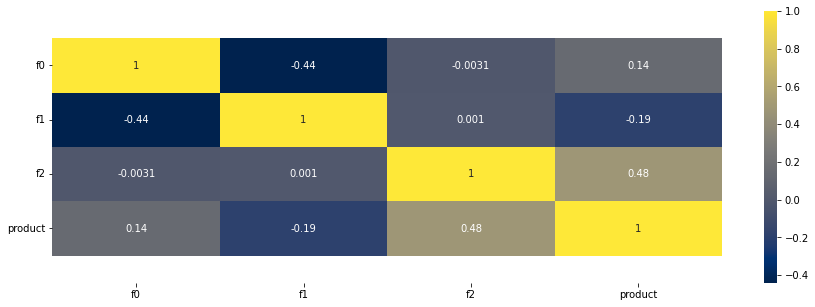

In [44]:
corr(region_zero)

The heat map that visualizes the correlation between the variables shows us that the connection between them is quite weak. The interesting thing that we see here is that among all features, **f2** seems to have the greatest influence on the target variable - **product**. The correlation value between the feature **f2** and the target variable **product** is 0.48 - which is not very high, but it's the highest in comparison to the other features in this particular dataset. 

**region one**

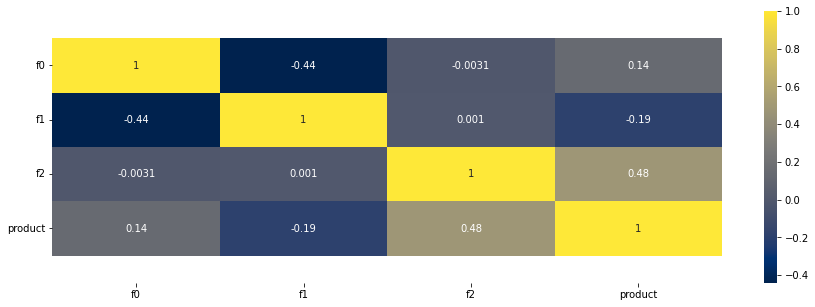

In [45]:
corr(region_one)

Here also we see that the correlation between the variables is quite weak. The same as we noticed in the previous dataset, the feature **f2** has the greatest influence on the target variable - **product**. The correlation value of these two variables is like on the previous dataset - 0.48. 

**region two**

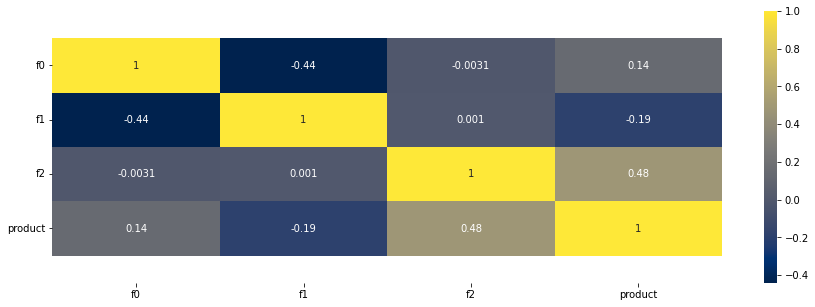

In [46]:
corr(region_two)

Same results here. The feature **f2** has the greatest influence on the target variable **product** and has the same correlation value as in the other two datasets - 0.48.

So, an overall conclusion can be that the feature **f2** has the biggest influence and the strongest connection to the target variable **product** in all three regions. 

Great!

Let's move on to the next region.

Our features for all three datasets are standardized!

**Summary**

In this step, we learned and also prepared the data for our model training and predictions. We examined the following:
1. missing values
2. duplicates
3. distribution of the variables
4. outliers
5. correlation

Now our data is ready for our ML model to predict what is the best place for a new well.

Let's go!

## 2. Train and test the model for each region:

**2.1. Split the data into a training set and validation set at a ratio of 75:25.**

In [47]:
# Region zero split to train and validation
train_0, valid_0 = train_test_split(region_zero, test_size = 0.25, random_state = 12345, shuffle = True)

# Region one split to train and validation
train_1, valid_1 = train_test_split(region_one, test_size = 0.25, random_state = 12345, shuffle = True)

# Region two split to train and validation
train_2, valid_2 = train_test_split(region_two, test_size = 0.25, random_state = 12345, shuffle = True)

# Checking that the splitting of the data was done correctly
train=[train_0, train_1, train_2]
valid = [valid_0, valid_1, valid_2]
for i in range(len(train)):
    print(region_name[i], 'data split ratio: test-{:.0%}'.format(len(train[i])/len(regions[i])), 
          'valid-{:.0%}'.format(len(valid[i])/len(regions[i])))

Region zero data split ratio: test-75% valid-25%
Region one data split ratio: test-75% valid-25%
Region two data split ratio: test-75% valid-25%


Excellent!

Let's move on.

**2.2. Train the model and make predictions for the validation set.**

Now let's standardize the features in each region. 

In [48]:
# Creating a list with all features
numeric = ['f0', 'f1', 'f2']

# Intializing the scaler
scaler = StandardScaler()

**region zero**

In [49]:
# Tuning the scaler (calculating the mean and variance) and transforming the test set
scaler.fit(train_0[numeric])
train_0[numeric] = scaler.transform(train_0[numeric])

# Transforming the valid set 
valid_0[numeric] = scaler.transform(valid_0[numeric])

In [50]:
train_0.head(3)

,f0,f1,f2,product
37058,0.067748,1.355414,-0.235102,26.251373
8688,-0.681840,-0.288630,-0.529047,88.182683
21535,-0.229186,-0.932455,-1.857592,68.066363


In [51]:
valid_0.head(3)

,f0,f1,f2,product
95307,-0.717194,1.556864,0.812937,129.176157
69336,-0.946367,1.770864,-0.064628,33.533108
39940,0.325683,-1.529305,-0.457066,82.037757


In [52]:
print('Train set region zero mean and variance:')
print()
for i in range(len(numeric)):
    print('Mean of', numeric[i], 'feature:', round(train_0[numeric[i]].mean()))
    print('Variance of', numeric[i], 'feature:', round(train_0[numeric[i]].var()))
    print('=========================')

Train set region zero mean and variance:

Mean of f0 feature: 0
Variance of f0 feature: 1
Mean of f1 feature: 0
Variance of f1 feature: 1
Mean of f2 feature: 0
Variance of f2 feature: 1


In [53]:
print('Valid set region zero mean and variance:')
print()
for i in range(len(numeric)):
    print('Mean of', numeric[i], 'feature:', round(valid_0[numeric[i]].mean()))
    print('Variance of', numeric[i], 'feature:', round(valid_0[numeric[i]].var()))
    print('=========================')

Valid set region zero mean and variance:

Mean of f0 feature: 0
Variance of f0 feature: 1
Mean of f1 feature: 0
Variance of f1 feature: 1
Mean of f2 feature: 0
Variance of f2 feature: 1


**region one**

In [54]:
# Transforming the test set
train_1[numeric] = scaler.transform(train_1[numeric])

# Transforming the valid set 
valid_1[numeric] = scaler.transform(valid_1[numeric])

In [55]:
train_1.head(3)

,f0,f1,f2,product
8989,-8.001060,-22.128990,-0.795538,3.179103
68582,-11.396197,-21.387603,-0.161057,57.085625
77080,7.731645,-0.449043,-0.158663,53.906522


In [56]:
valid_1.head(3)

,f0,f1,f2,product
63993,-11.779178,-27.119759,-0.479734,30.132364
29603,-5.242678,-12.318814,-0.161545,53.906522
23902,-10.293296,-14.726680,0.158173,84.038886


In [57]:
print('Train set region one mean and variance:')
print()
for i in range(len(numeric)):
    print('Mean of', numeric[i], 'feature:', round(train_1[numeric[i]].mean()))
    print('Variance of', numeric[i], 'feature:', round(train_1[numeric[i]].var()))
    print('=========================')

Train set region one mean and variance:

Mean of f0 feature: 1
Variance of f0 feature: 105
Mean of f1 feature: -10
Variance of f1 feature: 95
Mean of f2 feature: 0
Variance of f2 feature: 0


In [58]:
print('Valid set region one mean and variance:')
print()
for i in range(len(numeric)):
    print('Mean of', numeric[i], 'feature:', round(valid_1[numeric[i]].mean()))
    print('Variance of', numeric[i], 'feature:', round(valid_1[numeric[i]].var()))
    print('=========================')

Valid set region one mean and variance:

Mean of f0 feature: 1
Variance of f0 feature: 106
Mean of f1 feature: -10
Variance of f1 feature: 95
Mean of f2 feature: 0
Variance of f2 feature: 0


**region two**

In [59]:
# Transforming the test set
train_2[numeric] = scaler.transform(train_2[numeric])

# Transforming the valid set 
valid_2[numeric] = scaler.transform(valid_2[numeric])

In [60]:
train_2.head(3)

,f0,f1,f2,product
28621,-0.447121,-1.180208,1.654875,138.167082
11115,-0.610495,-0.869847,-0.221635,28.486457
23508,1.513336,3.434183,-0.883745,38.367166


In [61]:
valid_2.head(3)

,f0,f1,f2,product
50862,-1.767795,-0.126883,-1.470967,83.696365
15634,-0.379840,-5.432731,-1.582162,90.353390
32055,-0.290180,-6.014640,-0.243366,117.807251


In [62]:
print('Train set region two mean and variance:')
print()
for i in range(len(numeric)):
    print('Mean of', numeric[i], 'feature:', round(train_2[numeric[i]].mean()))
    print('Variance of', numeric[i], 'feature:', round(train_2[numeric[i]].var()))
    print('=========================')

Train set region two mean and variance:

Mean of f0 feature: -1
Variance of f0 feature: 3
Mean of f1 feature: 0
Variance of f1 feature: 10
Mean of f2 feature: 0
Variance of f2 feature: 1


In [63]:
print('Valid set region two mean and variance:')
print()
for i in range(len(numeric)):
    print('Mean of', numeric[i], 'feature:', round(valid_2[numeric[i]].mean()))
    print('Variance of', numeric[i], 'feature:', round(valid_2[numeric[i]].var()))
    print('=========================')

Valid set region two mean and variance:

Mean of f0 feature: -1
Variance of f0 feature: 3
Mean of f1 feature: -1
Variance of f1 feature: 10
Mean of f2 feature: 0
Variance of f2 feature: 1


**Building ML models**

In [64]:
# Setting the features and target variables for region zero
features_train_0 = train_0.drop(['product'], axis =1)
target_train_0 = train_0['product']

features_valid_0 = valid_0.drop(['product'], axis =1)
target_valid_0 = valid_0['product']

# Setting the features and target variables for region zero
features_train_1 = train_1.drop(['product'], axis =1)
target_train_1 = train_1['product']

features_valid_1 = valid_1.drop(['product'], axis =1)
target_valid_1 = valid_1['product']

# Setting the features and target variables for region zero
features_train_2 = train_2.drop(['product'], axis =1)
target_train_2 = train_2['product']

features_valid_2 = valid_2.drop(['product'], axis =1)
target_valid_2 = valid_2['product']

In [65]:
# Initializing the Linear Regression model 
reg = LinearRegression()

# Training and predicting for region zero
fit_0 = reg.fit(features_train_0, target_train_0)
predictions_valid_0 = reg.predict(features_valid_0)

# Training and predicting for region one
fit_1 = reg.fit(features_train_1, target_train_1)
predictions_valid_1 = reg.predict(features_valid_1)

# Training and predicting for region two
fit_2 = reg.fit(features_train_2, target_train_2)
predictions_valid_2 = reg.predict(features_valid_2)

**2.3. Save the predictions and correct answers for the validation set.**

We did it in the previous step :)

**2.4. Print the average volume of predicted reserves and model RMSE.**

In [66]:
# Setting lists of all predictions and right answers for all  three regions
predictions_valid = [predictions_valid_0, predictions_valid_1, predictions_valid_2]
target_valid = [target_valid_0, target_valid_1, target_valid_2]

# Building a loop to print all desired metrics for all regions 
for i in range(len(target_valid)):
    average_volume = predictions_valid[i].mean()
    rmse = mean_squared_error(target_valid[i], predictions_valid[i])**0.5
    print(region_name[i], 'metrics:')
    print('Average volume of predicted reserves:', round(average_volume,2))
    print('RMSE:', round(rmse,2))
    print('===========================================')
    print()

Region zero metrics:
Average volume of predicted reserves: 92.49
RMSE: 37.67

Region one metrics:
Average volume of predicted reserves: 68.87
RMSE: 0.89

Region two metrics:
Average volume of predicted reserves: 94.3
RMSE: 40.44



**2.5. Analyze the results.**

The results are interesting. 

In general, we want as low RMSE value as we can get. The lower the RMSE, the better the model fitting is (that way the data is more concentrated around the line of best fit). So in terms of RMSE, **region one** is the best of all three. It has the lowest RMSE score: 0.89, which is below zero. It means that there is a deviation of only 890 barrels, while in regions zero and two the deviation is around 40 thousand barrels. That is quite a large and very significant difference!

On the other hand, **regions zero and two** have the biggest and almost the same average volume of predicted oil reserves: around 95 thousand barrels. Region one has the lowest average volume of predicted oil reserves - around 70 thousand barrels. We have a difference in around 25 thousand barrels - that's also a significant difference!

## 3. Prepare for profit calculation:

**3.1 Store all key values for calculations in separate variables.**

In [67]:
cost_dev_budget_200 = 100000000
cost_dev_one_well = 100000000/200
revenue_per_unit = 4500
min_risk = 0.025

**3.2 Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.**

In [68]:
min_well_volume = cost_dev_one_well/revenue_per_unit
print('The smallest volume of reserves needed for developing a new well without losses:', math.ceil(min_well_volume))

The smallest volume of reserves needed for developing a new well without losses: 112


Let's compare this number with the findings of the averages that we found earlier.

**Region zero**
* Average volume of predicted reserves: 92.49
* Required minimum reserves: 112
* **Conclusion:** The average volume of reserves in region zero is **insufficient** for developing a new well without losses.

**Region one**
* Average volume of predicted reserves: 68.87
* Required minimum reserves: 112
* **Conclusion:** The average volume of reserves in region zero is **insufficient** for developing a new well without losses.

**Region two**
* Average volume of predicted reserves: 94.3
* Required minimum reserves: 112
* **Conclusion:** The average volume of reserves in region zero is **insufficient** for developing a new well without losses.

**3.3 Provide the findings about the preparation for profit calculation step.**

**Overall conclusion:** 

None of the three regions have sufficient average volume of reserves for developing a new well without losses.

## 4. Write a function to calculate profit from a set of selected oil wells and model predictions:

**4.1 Pick the wells with the highest values of predictions.**

We were given the condition that for profit calculation, the research is done on 500 wells with the selection of the 200 best wells. So for this task, we select at random 500 wells per region, and from them, we selected the top 200.

In [69]:
# Adding a predictions column to the regions datasets
valid_0['predictions'] = predictions_valid_0
valid_1['predictions'] = predictions_valid_1
valid_2['predictions'] = predictions_valid_2

In [70]:
# Region zero: picking the best 200 wells 
wells_200_0 = valid_0.sample(n=500, replace=True).sort_values(by=['predictions'], ascending = False).head(200)

# Region one: picking the best 200 wells  
wells_200_1 = valid_1.sample(n=500, replace=True).sort_values(by=['predictions'], ascending = False).head(200)

# Region two: picking the best 200 wells  
wells_200_2 = valid_2.sample(n=500, replace=True).sort_values(by=['predictions'], ascending = False).head(200)

Nice!

Let's move on.

**4.2. Summarize the target volume of reserves in accordance with these predictions**

In [71]:
# Summarizing top wells volume reserves in each region
top_200 = [wells_200_0['product'], wells_200_1['product'], wells_200_2['product']]
for i in range(len(top_200)):
    print(region_name[i], 'top 200 wells volume reserves:', round(top_200[i].sum(), 2), 'barrels')

Region zero top 200 wells volume reserves: 23036.35 barrels
Region one top 200 wells volume reserves: 23001.64 barrels
Region two top 200 wells volume reserves: 22716.58 barrels


It seems that **region one** has the largest volume of oil reserves.

**4.3. Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.**

Now we will build a function that will calculate the profit. We will use the variables that we created in the previous steps to pick the most profitable region for developing oil wells. 

In [72]:
def well_200_dev_profit(data, predictions, dev_cost):
    
    # Adding a predictions column to the dataset
    data['predictions'] = predictions
    
    # Picking randomly 500 wells and finding the best 200
    best_200_wells = data.sample(n=500, replace=True).sort_values(by=['predictions'], ascending = False).head(200)
    
    # Calculating the revenue with the target values of the corresponding 200 bestpredicted wells 
    target_revenue = best_200_wells['product'].sum() * revenue_per_unit
    
    # Calculating the profit: subtraction of the development cost from the target revenue
    profit = math.ceil(target_revenue - dev_cost)
    
    # Returning the profit value
    return profit

Now let's calculate the profit for each region and pick the region with the highest profit.

In [73]:
profits = []
valid = [valid_0, valid_1, valid_2]
predictions = [predictions_valid_0, predictions_valid_1, predictions_valid_2]
for i in range(len(valid)):
    profit = well_200_dev_profit(valid[i], predictions[i], cost_dev_budget_200)
    profits.append(profit)
    print(region_name[i], 'estimated profit of developing 200 oil wells:', profit, 'dollars')

Region zero estimated profit of developing 200 oil wells: 6223599 dollars
Region one estimated profit of developing 200 oil wells: 5940000 dollars
Region two estimated profit of developing 200 oil wells: 2678250 dollars


In [74]:
# Picking the most profitable region
dicts = {}
keys = region_name

# Building a loop for creating a dictionary
for i in range(len(keys)):
    dicts[keys[i]] = profits[i]
    
max_mean = max(dicts.values())
for i in range(len(keys)):
    if dicts[keys[i]] == max_mean:
        print(keys[i], 'is the most frofitable region with', max_mean, 'million dollars.')

Region zero is the most frofitable region with 6223599 million dollars.


So here we see that the most profitable region for 200 oil wells development is **region zero**.

The profit calculation led us to the suggestion to develop new oil wells in **region zero** -  It has the highest profit! 

## 5. Calculate risks and profit for each region:

**5.1. Use the bootstrapping technique with 1000 samples to find the distribution of profit.**

In [75]:
# Creating a RandomState() instance so that with each new call, its state will change to random
state = np.random.RandomState(12345)

# Finding the profit distribution for region zero with the bootstrapping technique
values_0 = []
for i in range(1000):
    values_0.append(well_200_dev_profit(valid_0, predictions_valid_0, cost_dev_budget_200))
    
# Finding the profit distribution for region one with the bootstrapping technique
values_1 = []
for i in range(1000):
    values_1.append(well_200_dev_profit(valid_1, predictions_valid_1, cost_dev_budget_200))
    
# Finding the profit distribution for region two with the bootstrapping technique
values_2 = []
for i in range(1000):
    values_2.append(well_200_dev_profit(valid_2, predictions_valid_2, cost_dev_budget_200))

In [76]:
# Printing the mean of each the profit distribution for each region
dis_profit = [values_0, values_1, values_2]
for i in range(len(region_name)):
    print(region_name[i], 'profit distribution mean:', mean(dis_profit[i]))

Region zero profit distribution mean: 4146674.772
Region one profit distribution mean: 4376113.647
Region two profit distribution mean: 2723310.416


In [77]:
# Picking the most profitable region
dicts_new = {}
keys = region_name
values = [mean(values_0), mean(values_1), mean(values_2)]

# Building a loop for creating a dictionary
for i in range(len(keys)):
    dicts_new[keys[i]] = values[i]
    
max_mean = max(dicts_new.values())
for i in range(len(keys)):
    if dicts_new[keys[i]] == max_mean:
        print(keys[i], 'is the most frofitable region with', max_mean, 'million dollars.')

Region one is the most frofitable region with 4376113.647 million dollars.


The output shows us that the profit in the **region one** is distributed around the highest profit value.

**5.2. Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.**

We already found the average profit in the previous stage, but we will write it again :)

In [78]:
# Printing the mean of each the profit distribution for each region
dis_profit = [values_0, values_1, values_2]
for i in range(len(region_name)):
    print(region_name[i], 'profit distribution mean:', mean(dis_profit[i]))

Region zero profit distribution mean: 4146674.772
Region one profit distribution mean: 4376113.647
Region two profit distribution mean: 2723310.416


Now let's find the 95% confidence interval for each region

In [79]:
reg_values = [pd.Series(values_0), pd.Series(values_1), pd.Series(values_2)]

# Calculating 95% confidence interval for region zero
for i in range(len(reg_values)):
    print(region_name[i],'95% confidence interval: [',round(reg_values[i].quantile(0.025),2), ',', 
          round(reg_values[i].quantile(0.975),2),']')

Region zero 95% confidence interval: [ -1243013.05 , 9159093.02 ]
Region one 95% confidence interval: [ 581142.9 , 8331506.25 ]
Region two 95% confidence interval: [ -2380994.38 , 8073407.18 ]


Now let's calculate the risk of losses.
Loss is negative profit so we will find for each region in the series of profits that we created earlier, what is the probability to maintain a loss. 

Let's go.

In [80]:
# Calculating the risk of loss for region zero
for i in range(len(reg_values)):
    negative_loss = reg_values[i][reg_values[i] <0]
    loss_prob = len(negative_loss) / len(reg_values[i])
    print()
    print(region_name[i], 'risk of loss:')
    print('Probability:',loss_prob)
    print('Percentage: {:.2%}'.format(loss_prob))
    print('===========================')


Region zero risk of loss:
Probability: 0.047
Percentage: 4.70%

Region one risk of loss:
Probability: 0.016
Percentage: 1.60%

Region two risk of loss:
Probability: 0.155
Percentage: 15.50%


So here we see that **region one** has the lowest percentage for risk loss: 1.6%. The other regions have a relatively high percentage of risk loss. **Region zero** has 3 times more risk than **region one**, and **region two** has 10 times more risk than **region one**. 

**5.3. Provide findings: suggest a region for development of oil wells and justify the choice.**

After the research that we have done with the bootstrapping technique, we will recommend developing new wells in **region one**. 

The highest distribution profit means is in **region one**, and **region one** also has a probability of 98.4% for positive profit - sounds like a good deal!.   

After wightning all the findings, **region one** is the preferable region to develop 200 new oil wells. It has the highest percentage of accuracy and profitability and the lowest percentage of risk loss, and we find all this to maximize the reliability and certainty of profit which is the most important criteria for any business.  

Biana.